In [ ]:
import yfinance as yf
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [ ]:
sp500 = yf.Ticker("^GSPC")

In [ ]:
sp500 = sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,0.0,0.0
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,0.0,0.0
2023-09-28 00:00:00-04:00,4269.649902,4317.270020,4264.379883,4299.700195,3846230000,0.0,0.0


In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-09-19 00:00:00-04:00', '2023-09-20 00:00:00-04:00',
               '2023-09-21 00:00:00-04:00', '2023-09-22 00:00:00-04:00',
               '2023-09-25 00:00:00-04:00', '2023-09-26 00:00:00-04:00',
               '2023-09-27 00:00:00-04:00', '2023-09-28 00:00:00-04:00',
               '2023-09-29 00:00:00-04:00', '2023-10-02 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24053, freq=None)

<Axes: xlabel='Date'>

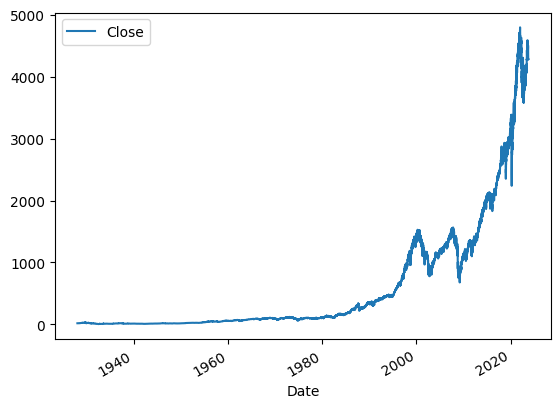

In [ ]:
sp500.plot.line(y="Close", use_index=True)

In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4274.509766
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4299.700195
2023-09-28 00:00:00-04:00,4269.649902,4317.270020,4264.379883,4299.700195,3846230000,4288.049805


In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4274.509766,1
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4299.700195,1
2023-09-28 00:00:00-04:00,4269.649902,4317.270020,4264.379883,4299.700195,3846230000,4288.049805,0


In [ ]:
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4274.509766,1
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4299.700195,1
2023-09-28 00:00:00-04:00,4269.649902,4317.270020,4264.379883,4299.700195,3846230000,4288.049805,0


In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
preds = model.predict(test[predictors])

preds = pd.Series(preds, index=test.index)

In [ ]:
preds

Date
2023-05-10 00:00:00-04:00    0
2023-05-11 00:00:00-04:00    1
2023-05-12 00:00:00-04:00    0
2023-05-15 00:00:00-04:00    1
2023-05-16 00:00:00-04:00    1
                            ..
2023-09-26 00:00:00-04:00    1
2023-09-27 00:00:00-04:00    1
2023-09-28 00:00:00-04:00    1
2023-09-29 00:00:00-04:00    1
2023-10-02 00:00:00-04:00    0
Length: 100, dtype: int64

In [ ]:
precision_score(test["Target"], preds)

0.5

In [ ]:
combined=pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

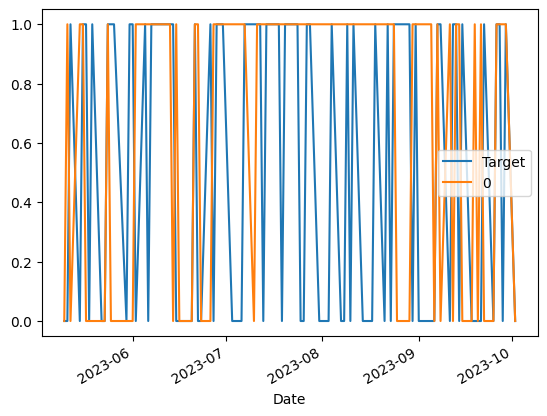

In [ ]:
combined.plot()

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds= model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions =[]

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

0    3438
1    2565
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5286549707602339

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533567
0    0.466433
Name: Target, dtype: float64

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_average = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [ ]:
sp500= sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio2,Trend_2,Close_Ratio5,Trend_5,Close_Ratio60,Trend_60,Close_Ratio250,Trend_250,Close_Ratio1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,4310.620117,4338.509766,4302.700195,4337.439941,3195650000,4273.529785,0,1.002007,1.0,0.993292,1.0,0.970427,30.0,1.053008,122.0,1.117666,531.0
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,4274.509766,1,0.992578,1.0,0.986356,1.0,0.956759,29.0,1.036861,122.0,1.100822,530.0
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,4299.700195,1,1.000115,1.0,0.992432,2.0,0.957625,29.0,1.036540,122.0,1.100696,531.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds= model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    4179
1.0     823
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5698663426488457